目標: 了解利用 PANDAS 整理資料, 利用資料視覺化可以很快的判斷結果

重點: 資料整理與視覺化可以加速理解機器學習

作業: (1) 繪製 SWARM 
    (2) 繪製 PaireGrid

In [1]:
# 載入相關的程式庫
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# 需要使用 Colab 請注意一下
# 先行確認 Colab 上面的版本
import keras
print("keras:",keras.__version__)
import tensorflow as tf
print("tf:",tf.__version__)


In [ ]:
## 需要使用 Colab 請注意一下
# Training code
# 新增網路硬碟
from google.colab import drive
drive.mount("/gdrive", force_remount=True)
#drive.mount('/gdrive')
import os
os.getcwd()

In [ ]:
#設定Google Drive路徑
root = "/gdrive"
path = "/gdrive/My Drive/Colab Notebooks/Visualization"
os.chdir(path)
os.getcwd()

In [2]:
### 利用 PANDAS 取得酒的品質資料 
df_red = pd.read_csv("winequality_red.csv")
df_white = pd.read_csv("winequality_white.csv")

In [3]:
#資料整理
df_red["color"] = "R"
df_white["color"] = "W"

#整合紅酒與白酒的資料
df_all=pd.concat([df_red,df_white],axis=0)

# 檢查合併後的資料集
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [4]:
df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
                       'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                       'free sulfur dioxide':'free_sulfur_dioxide',
                       'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
# 檢查合併後的資料集
df_all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [8]:
#處理缺失值
df = pd.get_dummies(df_all, columns=["color"])
df_all.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [9]:
#可以使用 info() 方法瞭解有關資料集屬性的更多資訊。特別是行和列的數量、列名稱、它們的數據類型和空值數。
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [10]:
#要瞭解數據集的統計摘要,即記錄數、平均值、標準差、最小值和最大值,我們使用描述()。
df_all.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


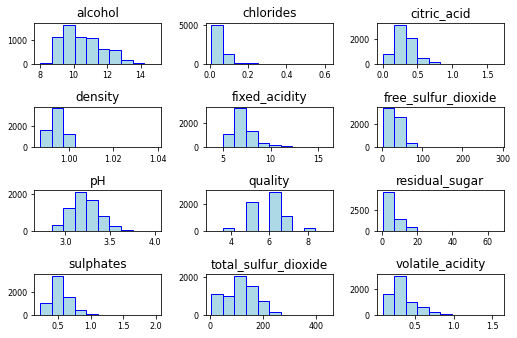

In [11]:
#可視化所有數值數據。在垂直軸上計數,在水平軸上使用值範圍。hist 函數通過將所有屬性繪製在一起使操作變得簡單。
df_all.hist(bins=10, color='lightblue',edgecolor='blue',linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False)    

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

熱圖是數據的二-D可視化,其中兩個要素之間的關係量級由色調表示。熱圖中的梯度根據屬性之間的相關性強度而變化。在下面的示例中,高度相關的屬性的陰影比其餘屬性暗。

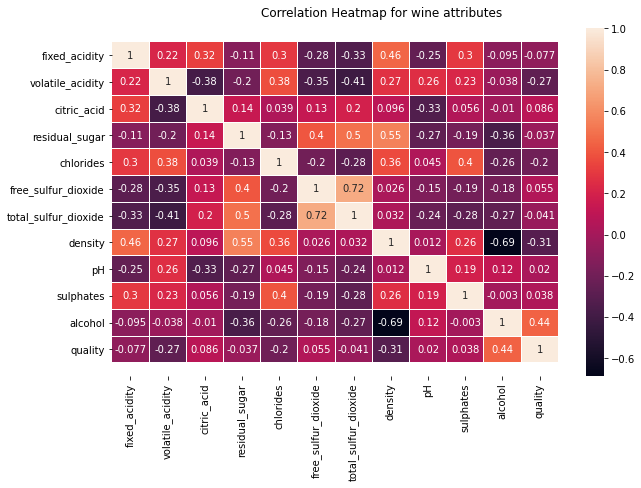

In [12]:
#Plotting heatmap
f, ax = plt.subplots(figsize=(10, 6))
b = sns.heatmap(df_all.corr(), annot=True, linewidths=.05, ax=ax)
f.subplots_adjust(top=0.93)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
title= f.suptitle('Correlation Heatmap for wine attributes', fontsize=12)

聯合圖用於顯示兩個變數之間的關係。您可以選擇從 5 個選項中繪製的繪圖種類 - 散點、reg、十六進位、kde、resid。下面我展示了三個使用線性回歸線('reg'的例子)
1. 第一個示例"檸檬酸"和"固定酸度"具有正相關關係,因此圖形是向上的。
2. 然而,硫酸鹽和酒精的變數是相關的。因此,線性回歸線幾乎是平的。
3.具有"揮發性酸度"和"檸檬酸"屬性的示例具有負相關性,因此圖呈向下。

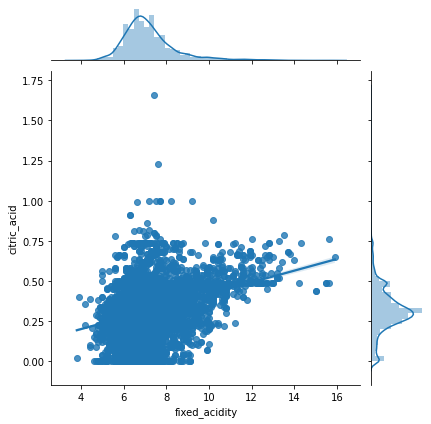

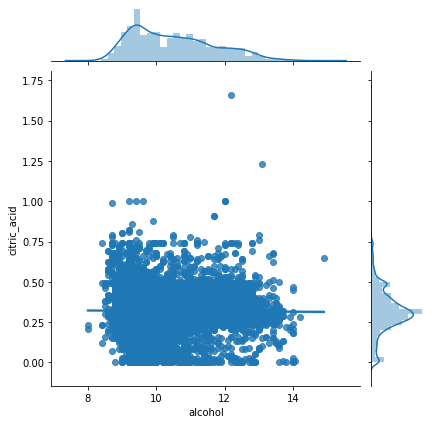

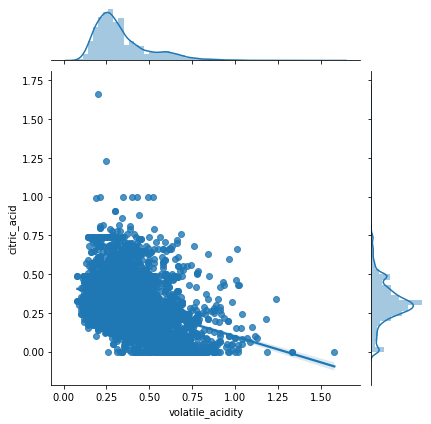

In [13]:
#Plotting Jointplot, 使用 'reg'== regression 回歸線繪製關係圖
a = sns.jointplot("fixed_acidity","citric_acid",data = df_all,kind ='reg', color = None)
b = sns.jointplot("alcohol", "citric_acid", data = df_all, kind = 'reg')
c = sns.jointplot("volatile_acidity", "citric_acid", data = df_all, kind = 'reg')

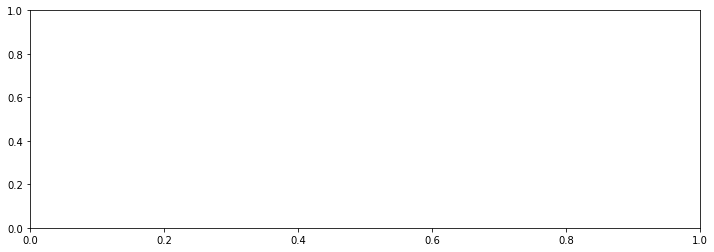

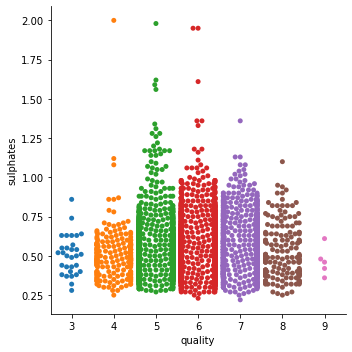

In [17]:
#展示分類數據
'''
Swarm沿分類軸(質量)調整記錄。這種繪圖將記錄分別標記,而不會重疊。這就是為什麼它最適合小型數據集的原因。
在此圖表中,您可以看到硫酸鹽的數量,根據品質。品質值為 6 的硫酸鹽密度最高,品質等級為 9 和 3 的最低
'''
'''
#在此一區域寫下程式碼
使用sns.catplot
f,ax = plt.subplots(figsize=(12, 4))
需要指定 X/Y Data
p = sns.catplot(x, y, kind = 'swarm', data= df_all,ax=ax)
'''
f,ax = plt.subplots(figsize=(12, 4))
p = sns.catplot(x='quality', y='sulphates', kind = 'swarm', data= df_all,ax=ax)

In [ ]:
'''
PairGrid 允許我們使用相同的繪圖類型繪製子圖網格來視覺化數據。
它形成子圖的矩陣。它有時也被稱為"散點圖矩陣"。
對網格的用法與分面網格類似。首先初始化網格,然後傳遞繪圖函數。
'''
'''
#在此一區域寫下程式碼
#設定底圖樣式
sns.set(style="white")

#利用PairGrid 繪製對角圖
使用 sns.PairGrid
g.map_upper
g.map_lower
g.map_diag
'''

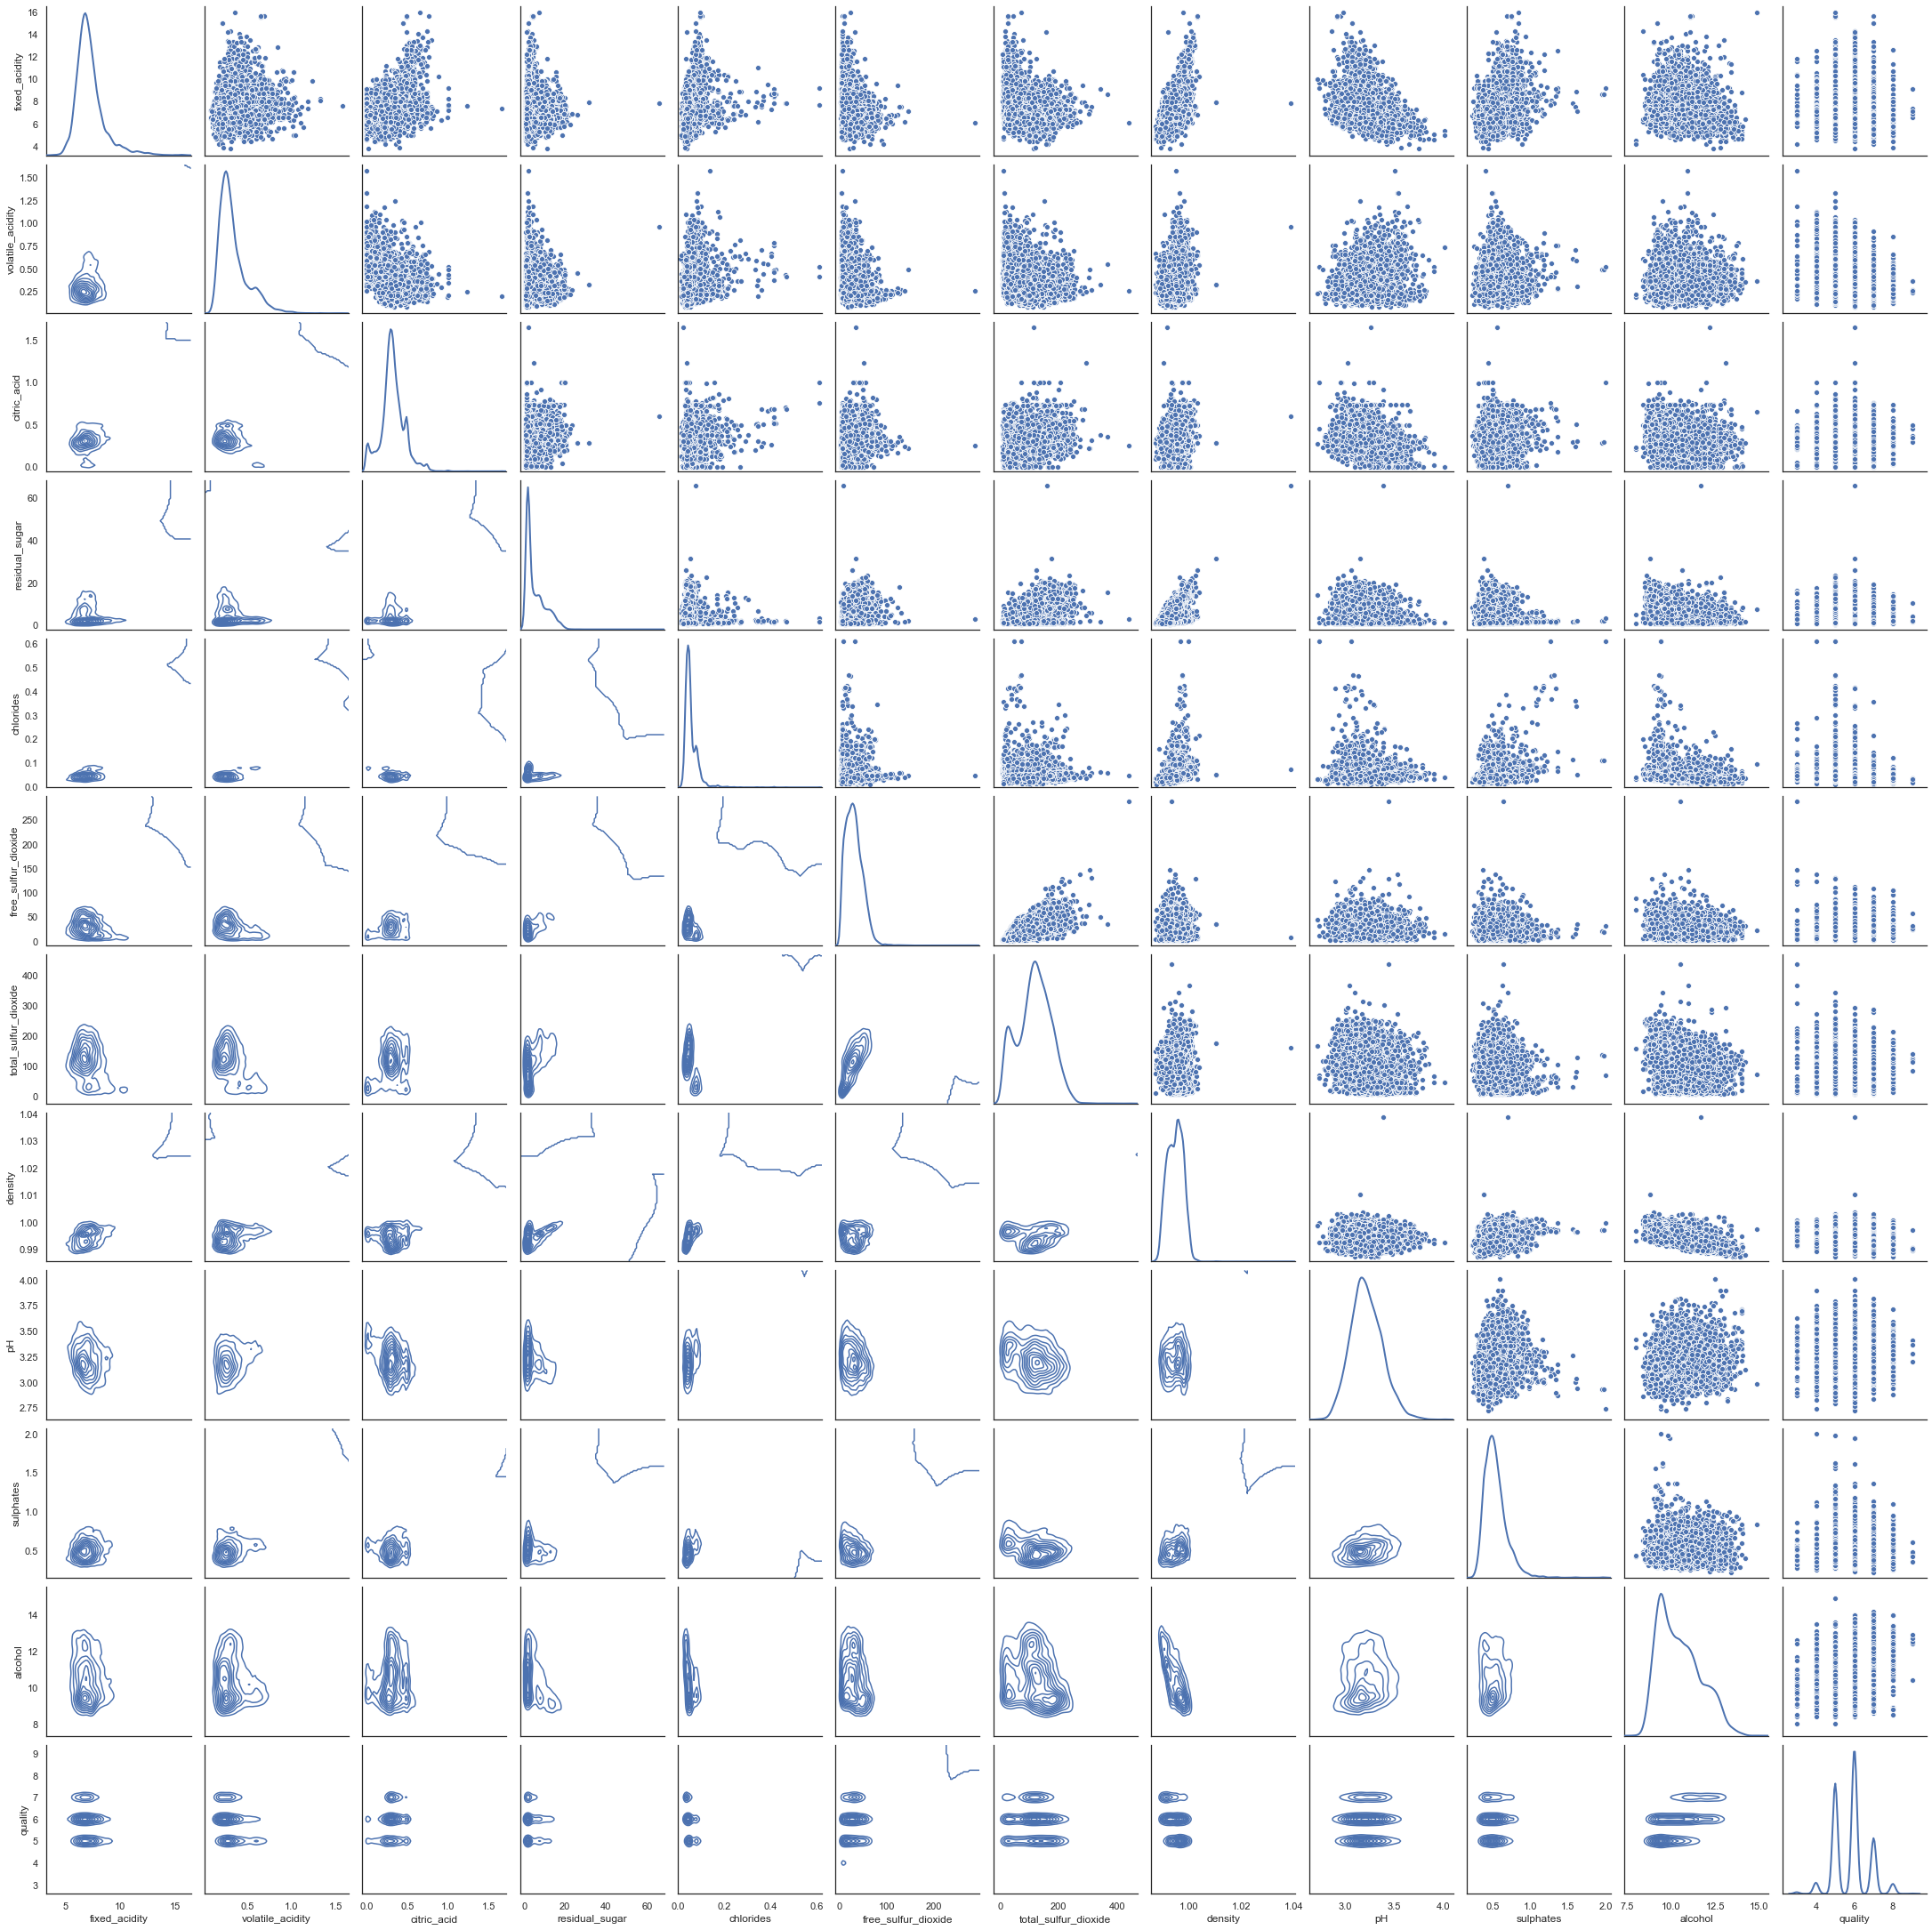

In [20]:
sns.set(style="white")
g = sns.PairGrid(df_all, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.kdeplot, lw=2)